In [71]:
!pip install tensorflow-gpu==2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 45.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [72]:
#Importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [74]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [75]:
#Divide the dataset into independent and dependent features
#X = Independent Feature
#y = Dependent Feature
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [76]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [77]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [78]:
#Feature Engineering

In [79]:
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [80]:
#Concatenate these variables with dataset
X = X.drop(['Geography','Gender'],axis = 1)

In [81]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [82]:
X = pd.concat([X,geography,gender],axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [83]:
#Splitting the dataset into training set and Test Set

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [86]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [88]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [89]:
X_train.shape

(8000, 11)

In [90]:
#Part 2
#Creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [91]:
#Lets initialize ANN
classifier = Sequential()

In [92]:
#Adding the input layer
classifier.add(Dense(units=11,activation = 'relu'))

In [93]:
#Adding the first hidden layer
classifier.add(Dense(units = 7,activation = 'relu'))

In [94]:
#Adding second hidden layer
classifier.add(Dense(units = 6,activation='relu'))

In [95]:
#Adding output layer
classifier.add(Dense(1,activation = 'sigmoid'))

In [96]:
#If we want to insert our own learning rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
classifier.compile(optimizer = opt,loss='binary_crossentropy',metrics = ['accuracy'])

In [97]:
#Using Adam optimizer for better results
classifier.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [98]:
#model_history = classifier.fit(X_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 1000)

In [99]:
#Here we are using 1000 epochs and after some epochs accuracy stoped improving.
#So here we are using Early Stopping
#Stop training when a monitored metric has stopped improving.

In [100]:
#Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [101]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 1000,callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 7ms/step - loss: 0.5481 - accuracy: 0.7595 - val_loss: 0.4528 - val_accuracy: 0.8020
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4232 - accuracy: 0.8220 - val_loss: 0.4173 - val_accuracy: 0.8137
Epoch 3/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3914 - accuracy: 0.8410 - val_loss: 0.3899 - val_accuracy: 0.8364
Epoch 4/1000
536/536 [==============================] - 6s 10ms/step - loss: 0.3692 - accuracy: 0.8535 - val_loss: 0.3779 - val_accuracy: 0.8398
Epoch 5/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3571 - accuracy: 0.8565 - val_loss: 0.3660 - val_accuracy: 0.8485
Epoch 6/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.3491 - accuracy: 0.8576 - val_loss: 0.3577 - val_accuracy: 0.8538
Epoch 7/1000
536/536 [==============================] - 6s 11ms/step - loss: 0.3441 - accuracy: 0.8584 - val_loss: 0.3552 - val_accurac

In [102]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

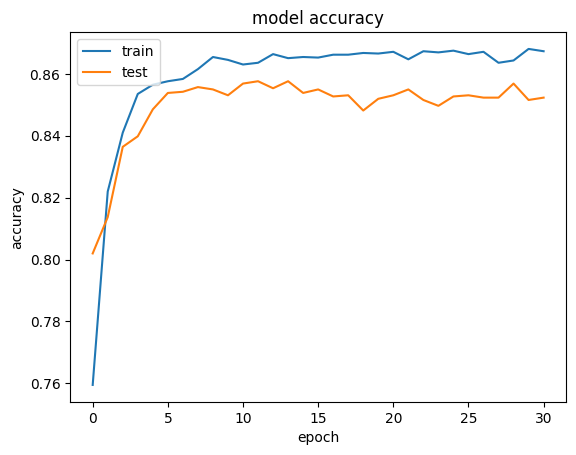

In [103]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

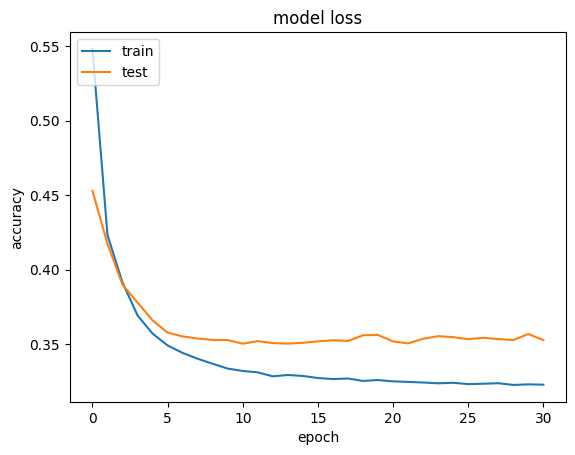

In [105]:
#Summarize history for Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
#Part 3 Making the predictions and evaluating the model

In [108]:
#Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7917e32343a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7917e32343a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - 0s 2ms/step


In [109]:
#Making Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1506,   89],
       [ 191,  214]])

In [110]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [111]:
score

0.86

In [112]:
#Get the weights
classifier.get_weights()

[array([[ 0.00749111,  0.05591145, -0.24623933,  0.01107594,  0.13726111,
          0.32431278, -0.02303103, -0.02108599,  0.34132856, -0.20598364,
         -0.06366672],
        [-0.5789229 , -0.00774062,  0.2474316 , -0.31821987,  0.04361234,
         -0.35948244,  0.09844737,  1.113011  ,  0.5079665 ,  0.7354758 ,
          0.49835476],
        [-0.14771114,  0.5802841 ,  0.6502315 , -0.16599554, -0.18543647,
         -0.07263906, -0.017177  ,  0.03406851, -0.01815095, -0.23967887,
          0.5051829 ],
        [-0.01419269, -0.15005854, -0.3239474 , -0.7867978 , -0.10853248,
          0.3393824 ,  0.28106079, -0.10671455,  0.06899392, -0.39609846,
         -0.24703056],
        [ 0.30427825,  0.3340684 ,  0.48197058,  0.84755546,  0.2595744 ,
          0.680508  ,  0.96633625,  0.40751612, -0.4845684 , -0.500129  ,
         -0.08740507],
        [-0.00464234, -0.14916588, -0.48436564, -0.05293788,  0.02366121,
         -0.02617862, -0.03274613, -0.02268611,  0.10779085, -0.0683644